# Домашняя работа №1
Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Жесткий срок сдачи:** 30 сентября 2016, 23:59 <br\>

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде: <br\>
** [Майнор ИАД 2016] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Домашняя-работа-№1-1" href="#Домашняя-работа-№1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашняя работа №1</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Регрессия-с-SVM-(3-балла)-2" href="#Регрессия-с-SVM-(3-балла)"><span class="toc-item-num">2&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Визуализация-данных-(1-балл)-2.1" href="#Визуализация-данных-(1-балл)"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Обучение-моделей-(2-балла)-2.2" href="#Обучение-моделей-(2-балла)"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Определение-языка-слова-(7-баллов)-3" href="#Определение-языка-слова-(7-баллов)"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Загрузка-(1-балл)-3.1" href="#Загрузка-(1-балл)"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Подготовка-данных-(2-балла)-3.2" href="#Подготовка-данных-(2-балла)"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка данных (2 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Расчет-ядра-(3-балла)-3.3" href="#Расчет-ядра-(3-балла)"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет ядра (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Оценка-качества-(1-балл)-3.4" href="#Оценка-качества-(1-балл)"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

<hr\>

# Регрессия с SVM (3 балла)

Неудивительно, что принципы SVM так же прекрасно ложатся на задачу регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных и выведите их на графике.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

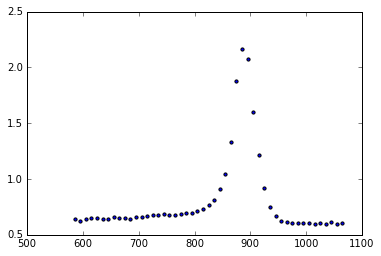

In [2]:
data =pd.read_csv("titanium.csv")
x = data["x"]
y = data["y"]
plt.scatter(x, y, s = 10)
x = x.reshape(-1,1)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn import svm

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

Линейное ядро:

Наилучший C для MAE:  0.0817722474218 MAE:  0.176758858307


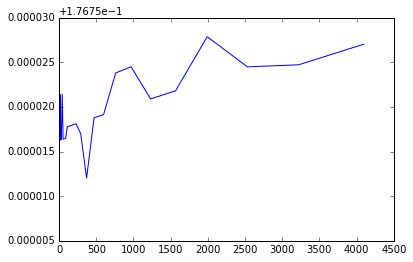

In [12]:
def mae_on_c_lin(reg_class, c_values):
    mae = []
    p = []
    o = 1000
    for c in c_values:
        reg = reg_class(kernel='linear',C=c, epsilon=0.01)
        reg.fit(x, y)
        k = mean_absolute_error(y, reg.predict(x))
        mae.append(k)
        if k < o:
            o = k
            p.append(c)
    plt.figure()
    plt.plot(c_values, mae)
    print("Наилучший C для MAE: ", p[len(p)-1], "MAE: ",min(mae))
mae_on_c_lin(svm.SVR, np.logspace(start = -5, stop = 12, base = 2))

График, при оценке C в соответствии с mean absolute error:

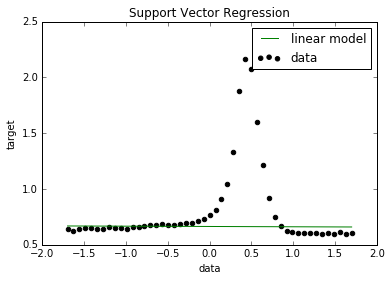

In [13]:
lin = svm.SVR(kernel='linear',C=0.0817722474218, epsilon=0.01).fit(x, y)
k = lin.predict(x)
plt.scatter(x, y, c='k', label='data')
plt.hold('on')
plt.plot(x, k, c='g', label='linear model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Найдём наилучший параметр C:

In [14]:
from sklearn.grid_search import GridSearchCV

C_range = np.logspace(start = -5, stop = 12, base = 2)
param_grid = dict(C=C_range)
grid = GridSearchCV(svm.SVR(kernel='linear', C = C_range, epsilon=0.01), param_grid=param_grid)
grid.fit(x, y)
k = grid.best_score_
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.03125} with a score of -26.75


График предсказаний:

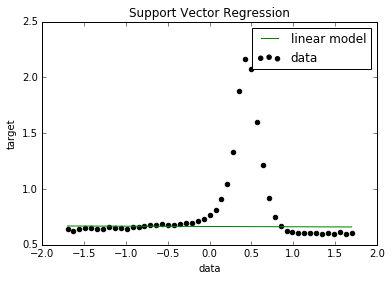

In [15]:
lin = svm.SVR(kernel='linear',C=0.03125, epsilon=0.01).fit(x, y)
k = lin.predict(x)
plt.scatter(x, y, c='k', label='data')
plt.hold('on')
plt.plot(x, k, c='g', label='linear model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [18]:
import pylev

ImportError: No module named 'pylev'

Полиномиальное ядро:

In [ ]:
def mae_on_c_poly(reg_class, c_values):
    mae = []
    p = []
    o = 1000
    for c in c_values:
        reg = reg_class(kernel='poly',C=c, epsilon=0.01, degree = 3, gamma = 6, coef0 = 1)
        reg.fit(x, y)
        k = mean_absolute_error(y, reg.predict(x))
        mae.append(k)
        if k < o:
            o = k
            p.append(c)
    plt.figure()
    plt.plot(c_values, mae)
    print("Наилучший C для MAE: ", p[len(p)-1], "MAE: ",min(mae))
mae_on_c_poly(svm.SVR, np.logspace(start = -5, stop = 12 , base = 2))

График, при оценке C в соответствии с mean absolute error:

In [ ]:
poly = svm.SVR(kernel='poly',C=0.111625202207, epsilon=0.01, degree = 3, gamma = 6, coef0 = 1).fit(x, y)
k = poly.predict(x)
plt.scatter(x, y, c='k', label='data')
plt.hold('on')
plt.plot(x, k, c='g', label='poly model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Найдём наилучший параметр C:

In [ ]:
from sklearn.grid_search import GridSearchCV

C_range = np.logspace(start = -5, stop = 12, base = 2)
param_grid = dict(C=C_range)
grid = GridSearchCV(svm.SVR(kernel='poly',C=C_range, epsilon=0.01, degree = 3, gamma = 6, coef0 = 1), param_grid=param_grid)
grid.fit(x, y)
k = grid.best_score_
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

График предсказаний:

In [ ]:
poly = svm.SVR(kernel='poly',C=0.03125, epsilon=0.01, degree = 3, gamma = 6, coef0 = 1).fit(x, y)
k = poly.predict(x)
plt.scatter(x, y, c='k', label='data')
plt.hold('on')
plt.plot(x, k, c='g', label='poly model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

RBF ядро:

In [ ]:
def mae_on_c_RBF(reg_class, c_values):
    mae = []
    p = []
    o = 1000
    for c in c_values:
        reg = reg_class(kernel='rbf',C=c, epsilon=0.01, gamma = 6, coef0 = 1)
        reg.fit(x, y)
        k = mean_absolute_error(y, reg.predict(x))
        mae.append(k)
        if k < o:
            o = k
            p.append(c)
    plt.figure()
    plt.plot(c_values, mae)
    print("Наилучший C для MAE: ", p[len(p)-1], "MAE: ",min(mae))
mae_on_c_RBF(svm.SVR, np.logspace(start = -5, stop = 12, base = 2))

График, при оценке C в соответствии с mean absolute error:

In [ ]:
rbf = svm.SVR(kernel='rbf',C=32.0, epsilon=0.01, gamma = 6, coef0 = 1).fit(x, y)
k = rbf.predict(x)
plt.scatter(x, y, c='k', label='data')
plt.hold('on')
plt.plot(x, k, c='g', label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Найдём наилучший параметр C:

In [ ]:
from sklearn.grid_search import GridSearchCV

C_range = np.logspace(start = -5, stop = 12, base = 2)
param_grid = dict(C=C_range)
grid = GridSearchCV(svm.SVR(kernel='rbf',C=C_range, epsilon=0.01, gamma = 6, coef0 = 1), param_grid=param_grid)
grid.fit(x, y)
k = grid.best_score_
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

График предсказаний:

In [ ]:
rbf = svm.SVR(kernel='rbf',C=0.03125, epsilon=0.01, gamma = 6, coef0 = 1).fit(x, y)
k = rbf.predict(x)
plt.scatter(x, y, c='k', label='data')
plt.hold('on')
plt.plot(x, k, c='g', label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

При большом C регуляризация слабая - модель подгоняется под данные, то есть возникает переобучение. А при малых C, регуляризация сильная - возникает недообучение. Примером может служить RBF модель.

 Возьмём C = 1000:

In [ ]:
rbf = svm.SVR(kernel='rbf',C=1000, epsilon=0.01, gamma = 6, coef0 = 1).fit(x, y)
k = rbf.predict(x)
plt.scatter(x, y, c='k', label='data')
plt.hold('on')
plt.plot(x, k, c='g', label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

 Возьмём C = 0.001:

In [ ]:
rbf = svm.SVR(kernel='rbf',C=0.001, epsilon=0.01, gamma = 6, coef0 = 1).fit(x, y)
k = rbf.predict(x)
plt.scatter(x, y, c='k', label='data')
plt.hold('on')
plt.plot(x, k, c='g', label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левенштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [ ]:
data_es = open("war_and_peace_es.txt").readlines()
data_en = open("war_and_peace_en.txt").readlines()
c = pd.DataFrame(data_es)
c['Label'] = c[:0]
for i in range(len(c["Label"])):
    c["Label"][i] = 1
k = pd.DataFrame(data_en)
k['Label'] = k[:0]
for i in range(len(k["Label"])):
    k["Label"][i] = 0
data = pd.concat([c,k])
data = data.rename(columns={0:'Word'})
data
pass

## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [ ]:
from sklearn.cross_validation import train_test_split
import random

In [ ]:
RND_SEED = random.seed(849)
new_data = data.sample(n = 3000)
new_data.reset_index()
pass

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_data["Word"], new_data["Label"], test_size=0.4, random_state=4213)

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левенштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [ ]:
from sklearn.metrics import accuracy_score